1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

3. Задание.

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('water.csv')

### Построение точечного графика

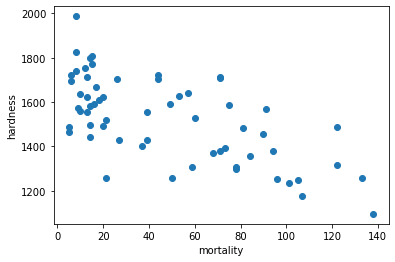

In [2]:
plt.scatter(df['hardness'], df['mortality'])
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.show()

### Расчет коэффициентов корреляции

In [3]:
corr = df[['mortality', 'hardness']].corr()['hardness']['mortality']
print(f'Корреляция (Пирсон): {corr:.2}')
corr_spearman = corr = df[['mortality', 'hardness']].corr(method='spearman')['hardness']['mortality']
print(f'Корреляция (Спирмен): {corr_spearman:.2}')

Корреляция (Пирсон): -0.65
Корреляция (Спирмен): -0.63


### Построение линейной регрессионной модели и вычисление коэффициента детерминации

Параметры модели: a = [-3.13167087], b = 1668.9722977277095
Коэффициент детерминации: 0.5046490611017092


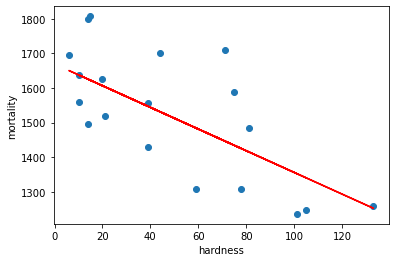

In [4]:
x = df[['hardness']]
y = df['mortality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
print(f'Параметры модели: a = {model.coef_}, b = {model.intercept_}')
y_pedict = model.predict(x_test)
determinantion = model.score(x_test, y_test)
print(f'Коэффициент детерминации: {determinantion}')
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pedict, color='r')
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.show()

### График остатков

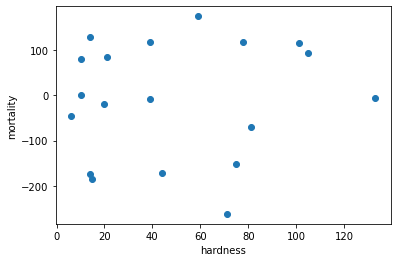

In [5]:
plt.scatter(x_test, y_pedict - y_test)
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.show()

In [6]:
def build_regg_model(df_):
    # Расчет коэффициентов корреляции
    corr = df_[['mortality', 'hardness']].corr()['hardness']['mortality']
    print(f'Корреляция (Пирсон): {corr:.2}')
    corr_spearman = corr = df_[['mortality', 'hardness']].corr(method='spearman')['hardness']['mortality']
    print(f'Корреляция (Спирмен): {corr_spearman:.2}')
    # Построение линейной регрессионной модели и вычисление коэффициента детерминации
    x = df_[['hardness']]
    y = df_['mortality']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print(f'Параметры модели: a = {model.coef_}, b = {model.intercept_}')
    y_pedict = model.predict(x_test)
    determinantion = model.score(x_test, y_test)
    print(f'Коэффициент детерминации: {determinantion}')
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pedict, color='r')
    plt.xlabel('hardness')
    plt.ylabel('mortality')
    plt.show()
    # График остатков
    plt.scatter(x_test, y_pedict - y_test)
    plt.xlabel('hardness')
    plt.ylabel('mortality')
    plt.show()

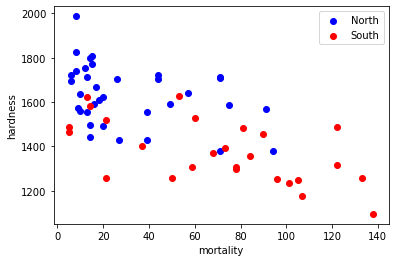

Северные города
Корреляция (Пирсон): -0.37
Корреляция (Спирмен): -0.4
Параметры модели: a = [-1.97686226], b = 1688.150229031281
Коэффициент детерминации: 0.018885304285745863


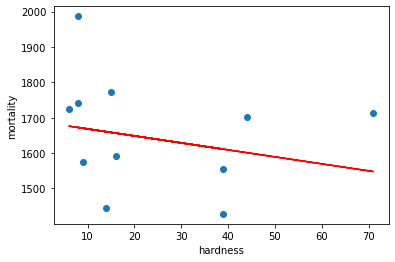

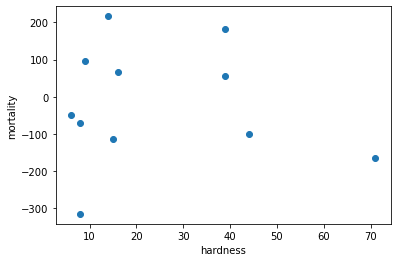


Южные города
Корреляция (Пирсон): -0.6
Корреляция (Спирмен): -0.6
Параметры модели: a = [-3.51342921], b = 1640.2204603423374
Коэффициент детерминации: -2.551922301235205


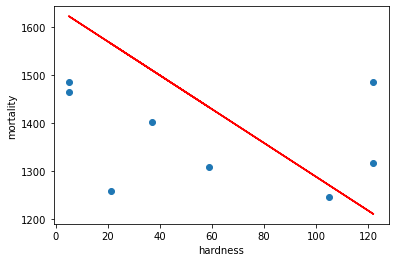

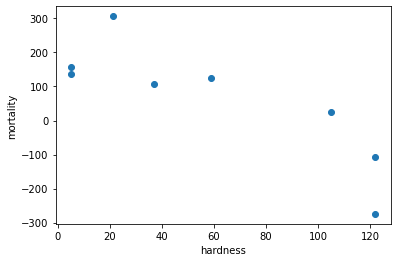

In [7]:
df_north = df.query('location == \'North\'')
df_south = df.query('location == \'South\'')

plt.scatter(df_north['hardness'], df_north['mortality'], color='b')
plt.scatter(df_south['hardness'], df_south['mortality'], color='r')
plt.xlabel('mortality')
plt.ylabel('hardness')
plt.legend(labels=['North', 'South'])
plt.show()

print('Северные города')
build_regg_model(df_north)
print('\nЮжные города')
build_regg_model(df_south)
